# *LOAN APPROVAL PREDITION*

<b>LECTURER:</b> Mr Rueden Moyo<br>
<b>By:</b> Jones Thukuta

<h3>OVERVIEW,</h3>
<p>This is a data wrangling and exploratory analysis on a laon approval prediction dataset. It comprises: Data cleaning, Data Transformation and some data exploratory analysis supported by visualizations alongside the obervations. Here is the table of contents: </p>
<h2>Table of Contents</h2>

[Importing Neccessary Libraries](#importing)<br>
[1. Reading the dataset](#Readingthedataset)<br>
[2. Data Cleaning](#cleaning)<br>
[2.1 Dealing with missing values](#dealingWithMissingValues)<br>
[2.1.1 Checking number of missing values](#checkingNumberOfMissingValues)<br>
[2.1.2 Filling in missing values of object types](#fillingObjectTypeValues)<br>
[2.1.3 Filling in missing values of numeric types](#fillingNumericMissingValues)<br>
[2.1.4 Cross checking if all fields has been filled](#checkingIfAllFieldsAreFilled)<br>
[2.2 Correcting data types](#dtypes)
[2.3 Checking if there are duplicates ](#checkingForDuplictes)<br>
[2.4 Addressing inconsistencies ](#addressingInconsities)<br>
[2.4.1 checking for outliers](#checkingOutliers)<br>
[3. Data Transformation](#transformation)<br>
[3.1 Creating new variables](#creatingNewVariables)<br>
[3.1.1 Feature combination](#feature_combination)<br>
[3.2 Log Tranform](#log_transform)<br>
[3.2.1 Log tranform on Total_Applicant_Income](#log_tranform_total_applicant_income)<br>
[3.2.2 Log Transform of LoanAmount](#log_transform_of_loan_amount)<br>
[3.2.3 Log Tranform for Loan_Amount_Term](#log_transform_for_loan_amount)<br>
[4. Exploratory Data Analysis](#eda)<br>
[4.1 Using count plots to observe the relationships in the dataset](#count_plots)<br>
[OBSERVATIONS](#count_plots_obervation)<br>
[4.2 Using Correlation heatmap to observe relationships accross numeric type fileds](#heatmap)<br>
[OBSERVATIONS](#heatmap_obervation)<br>
[4.3 Using Dist Plots to observe the distibution of numeric type fields](#dist)<br>
[OBSERVATION](#dist_observation)<br>
[4.4 Using Scatter Plots to observe the relationships between numemeric variables](#scatter)<br>
[OBSERVATION](#scatter_observation)<br>
[4.5 Using Box Plots to look for outliers](#box)<br>
[OBSERVATION](#box_obervation)<br>

<h1>Importing neccessary libraries</h1>
<a name="importing"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

<h1>1 Reading the dataset</h2>
<a name="Readingthedataset"></a>

In [2]:
df = pd.read_csv("Loan Prediction dataset.csv")
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df.shape

(614, 13)

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<h1>2. Data Cleaning</h1>
<a name="cleaning"></a>

<h2 name="dealingWithMissingValues">2.1 Dealing with missing values</h2>

<h3>2.1.1 Checking number of missing values</h3>
<a name="checkingNumberOfMissingValues"></a>

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<h3>2.1.2 Filling in missing values of object types</h3>
<a name="fillingObjectTypeValues"></a>

In [8]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

<h3>2.1.3 Filling in missing values of numeric types</h3>
<a name="fillingNumericMissingValues"></a>

In [9]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True)

<h3>2.1.4 Cross checking if all fields has been filled</h3>
<a name="checkingIfAllFieldsAreFilled"></a>

In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<h2>2.2 Correcting data types</h2>
<a name="dtypes"></a>
<p>It has been noted that ApplicantIncome is of int type and it is going to be changed to float since money is expressed in float type</p>

In [11]:
df["ApplicantIncome"] = df["ApplicantIncome"].astype(float)
print(df["ApplicantIncome"].dtype)

float64


<h2>2.3 Checking if there are duplicates </h2>
<a name="checkingForDuplictes"></a>

In [12]:
df.duplicated().any()

False

<h2>2.4 Addressing inconsistencies </h2>
<a name="addressingInconsities"></a>

<h3>2.4.1 checking for outliers</h3>
<a name="checkingOutliers"></a>

In [13]:
def detect_outliers_iqr(df):
  outliers_indices = []
  for column in df.columns:
    try:
      Q1 = df[column].quantile(0.25)
      Q3 = df[column].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR
      outliers_list_col = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
      outliers_indices.extend(outliers_list_col)
    except TypeError:
      ...
  return list(set(outliers_indices))

outliers_indices = detect_outliers_iqr(df)
print("Number of outliers:", len(outliers_indices))

Number of outliers: 264


**Observation** : since there are many outliers they are not going to be dropped rather there impact will be reduced during transformation

<h1>3. Data Transformation</h1>
<a name="transformation"></a>

<h2>3.1 Creating new variables</h2>
<a name="creatingNewVariables"></a>

<h3>3.1.1 Feature combination</h3>
<a name="feature_combination"></a>
<p>This will involve combing the values of CoapplicantIncome and ApplicantIncome inoder to have the Total_Applicant_Income. Which will reduce the  renduncy and also help in data reduction</p>

In [14]:
df['Total_Applicant_Income'] = df['CoapplicantIncome'] + df['ApplicantIncome']
df.drop(columns=['CoapplicantIncome', 'ApplicantIncome'], inplace=True)
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Applicant_Income
0,LP001002,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,267.000000,360.0,1.0,Urban,Y,9613.0
6,LP001013,Male,Yes,0,Not Graduate,No,95.000000,360.0,1.0,Urban,Y,3849.0
7,LP001014,Male,Yes,3+,Graduate,No,158.000000,360.0,0.0,Semiurban,N,5540.0
8,LP001018,Male,Yes,2,Graduate,No,168.000000,360.0,1.0,Urban,Y,5532.0
9,LP001020,Male,Yes,1,Graduate,No,349.000000,360.0,1.0,Semiurban,N,23809.0


<h2>3.2 Log Tranform</h2>
<a name="log_transform"></a>

<h3>3.2.1 Log tranform on Total_Applicant_Income</h3>
<a name="log_tranform_total_applicant_income"></a>

In [15]:
df['TotalApplicantIncome_log'] = np.log(df['Total_Applicant_Income'] + 1)
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Applicant_Income,TotalApplicantIncome_log
0,LP001002,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,Y,5849.0,8.674197
1,LP001003,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,N,6091.0,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,3000.0,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,4941.0,8.505525
4,LP001008,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,Y,6000.0,8.699681
5,LP001011,Male,Yes,2,Graduate,Yes,267.000000,360.0,1.0,Urban,Y,9613.0,9.170976
6,LP001013,Male,Yes,0,Not Graduate,No,95.000000,360.0,1.0,Urban,Y,3849.0,8.255828
7,LP001014,Male,Yes,3+,Graduate,No,158.000000,360.0,0.0,Semiurban,N,5540.0,8.619930
8,LP001018,Male,Yes,2,Graduate,No,168.000000,360.0,1.0,Urban,Y,5532.0,8.618485
9,LP001020,Male,Yes,1,Graduate,No,349.000000,360.0,1.0,Semiurban,N,23809.0,10.077861


<h3>3.2.2 Log Transform of LoanAmount</h3>
<a name="log_transform_of_loan_amount"></a>

In [16]:
df['LoanAmount_log'] = np.log(df['LoanAmount'] + 1)
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Applicant_Income,TotalApplicantIncome_log,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,Y,5849.0,8.674197,4.993232
1,LP001003,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,N,6091.0,8.714732,4.859812
2,LP001005,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693
3,LP001006,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,4941.0,8.505525,4.795791
4,LP001008,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827
5,LP001011,Male,Yes,2,Graduate,Yes,267.000000,360.0,1.0,Urban,Y,9613.0,9.170976,5.590987
6,LP001013,Male,Yes,0,Not Graduate,No,95.000000,360.0,1.0,Urban,Y,3849.0,8.255828,4.564348
7,LP001014,Male,Yes,3+,Graduate,No,158.000000,360.0,0.0,Semiurban,N,5540.0,8.619930,5.068904
8,LP001018,Male,Yes,2,Graduate,No,168.000000,360.0,1.0,Urban,Y,5532.0,8.618485,5.129899
9,LP001020,Male,Yes,1,Graduate,No,349.000000,360.0,1.0,Semiurban,N,23809.0,10.077861,5.857933


<h3>3.2.3 Log Tranform for Loan_Amount_Term</h3>
<a name="log_transform_for_loan_amount"></a>

In [17]:
df['Loan_Amount_Term_log'] = np.log(df['Loan_Amount_Term'] + 1)
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Applicant_Income,TotalApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log
0,LP001002,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,Y,5849.0,8.674197,4.993232,5.888878
1,LP001003,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,N,6091.0,8.714732,4.859812,5.888878
2,LP001005,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693,5.888878
3,LP001006,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,4941.0,8.505525,4.795791,5.888878
4,LP001008,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827,5.888878
5,LP001011,Male,Yes,2,Graduate,Yes,267.000000,360.0,1.0,Urban,Y,9613.0,9.170976,5.590987,5.888878
6,LP001013,Male,Yes,0,Not Graduate,No,95.000000,360.0,1.0,Urban,Y,3849.0,8.255828,4.564348,5.888878
7,LP001014,Male,Yes,3+,Graduate,No,158.000000,360.0,0.0,Semiurban,N,5540.0,8.619930,5.068904,5.888878
8,LP001018,Male,Yes,2,Graduate,No,168.000000,360.0,1.0,Urban,Y,5532.0,8.618485,5.129899,5.888878
9,LP001020,Male,Yes,1,Graduate,No,349.000000,360.0,1.0,Semiurban,N,23809.0,10.077861,5.857933,5.888878


## *Dropping some fields* 

In [18]:
df.drop(columns=['LoanAmount', 'Loan_Amount_Term', 'Total_Applicant_Income'],
          inplace=True, axis=1)
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,TotalApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.993232,5.888878
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,N,8.714732,4.859812,5.888878
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,8.505525,4.795791,5.888878
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878
5,LP001011,Male,Yes,2,Graduate,Yes,1.0,Urban,Y,9.170976,5.590987,5.888878
6,LP001013,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,8.255828,4.564348,5.888878
7,LP001014,Male,Yes,3+,Graduate,No,0.0,Semiurban,N,8.619930,5.068904,5.888878
8,LP001018,Male,Yes,2,Graduate,No,1.0,Urban,Y,8.618485,5.129899,5.888878
9,LP001020,Male,Yes,1,Graduate,No,1.0,Semiurban,N,10.077861,5.857933,5.888878


<h1>4. Exploratory Data Analysis</h1>
<a name="eda"></a>

<h2>4.1 Using count plots to observe the relationships in the dataset</h2>
<a name="count_plots"></a>

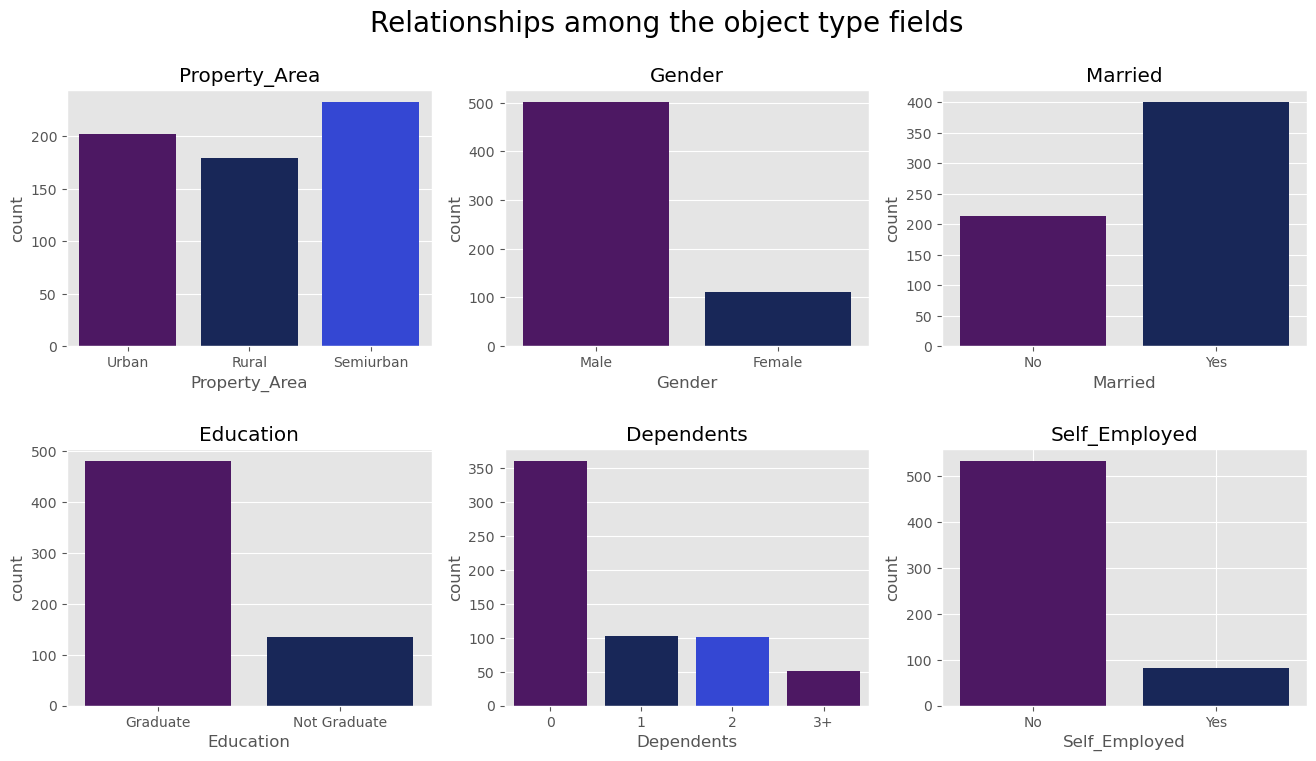

In [19]:
style.use('ggplot')
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
x_values = ['Gender', 'Married', 'Education', 'Dependents', 'Self_Employed', 'Property_Area']

for index, ax in enumerate(axes.flatten()):
    sns.countplot(x=x_values[index-1], data=df, ax=ax, palette=['#520b70', '#0d2163', '#1a33ed'])
    ax.set_title(x_values[index-1])
    plt.grid(True)

plt.subplots_adjust(wspace=0.2, hspace=0.4)
fig.suptitle('Relationships among the object type fields', fontsize=20)
plt.savefig("Visualizations/Count_Plots.jpg")
plt.show()

<h2><i>OBSERVATIONS<i/></h2>
<a name="count_plots_obervation"></a>
  <h3>1. Property Area:</h3>
    <ul>
      <li>The count of properties in Urban and Semiurban areas is higher compared to Rural areas.</li>
      <li>This tells us that Urban and rural areas could have different loan approval patterns</li>
    </ul>
  <h3>2. Gender:</h3>
    <ul>
      <li>There are significantly more males represented compared to females in the dataset.</li>
      <li>This may indicate, males are the predominant gender in loan applications, possibly due to socio-economic or cultural factors.</li>
      <li>This may affect the model's ability to generalize accross genders</li>
    </ul>
  <h3>3. Married:</h3>
    <ul>
      <li>The count of married individuals is higher than unmarried individuals.</li>
      <li>This may idicate, married individuals often apply for loans more frequently than unmarried individuals due to financial stability and combined income, making it easier to apply and get approved.</li>>
    </ul
  <h3>4. Education:</h3>
    <ul>
      <li>The count of graduates is much higher than the count of non-graduates.</li>
      <li>This may due to, graduates' better job prospects and higher incomes, making them more likely to qualify for loans.</li>
    </ul>
  <h3>5. Dependets:</h3>
    <ul>
      <li>The majority of individuals have 0 dependents, with a decreasing count as the number of dependents increases.</li>
      <li>This may due to financial burdens, while increasing dependents inversely correlate with loan applications.</li>
    </ul>
  <h3>6. Self_Employed:</h3>
    <ul>
      <li>The count of individuals who are not self-employed is significantly higher than those who are self-employed.</li>
      <li>This may so because, self-employed individuals often face more challenges in proving stable income for loan eligibility compared to regular salaried jobs.</li>
    </ul>

<h2>4.2 Using Correlation heatmap to observe relationships accross numeric type fileds</h2>
<a name="heatmap"></a>

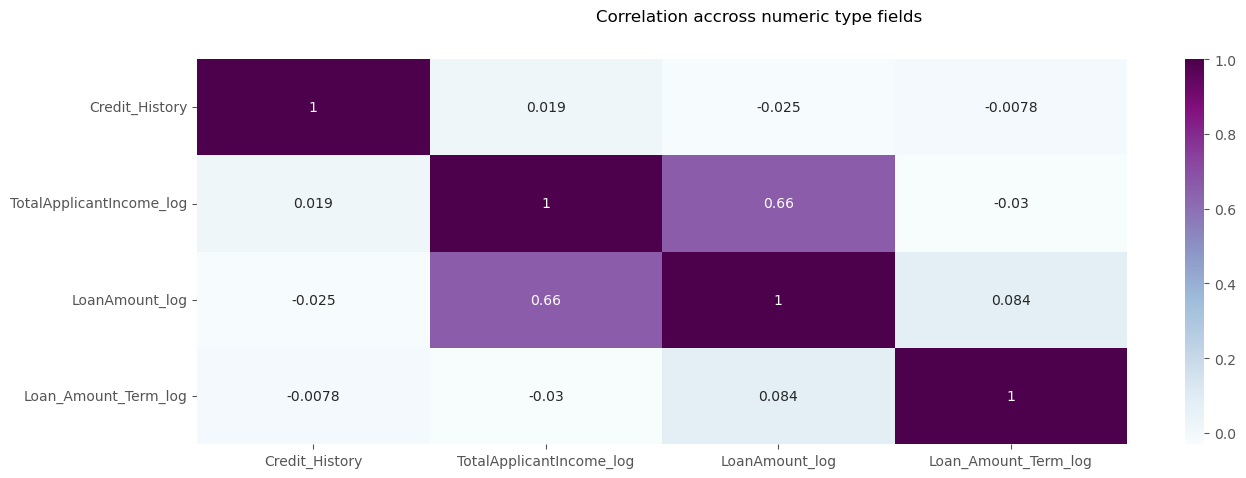

In [20]:
fig = plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(), annot=True, cmap='BuPu')
fig.suptitle("Correlation accross numeric type fields")
plt.savefig('Visualizations/Heatmap.png')
plt.show()

<h2><i>OBSERVATIONS</i></h2>
<a name="heatmap_obervation"></a>
  <h3>1. Credit history:</h3>
  <ul>
    <li>Credit_History and TotalApplicantIncome_log, Correlation coefficient is 0.019. indicating that an applicant’s credit history is independent of their income level.</li>
    <li>Credit_History and LoanAmount_log: Correlation coefficient is -0.025, implying that the credit history has little to no impact on the loan amount.</li>
    <li>Credit_History and Loan_Amount_Term_log: Correlation coefficient is -0.0078, indicating that the credit history does not significantly influence the term of the loan.</li>
  </ul>
  <h3>2. TotalApplicantIncome_log</h3>
    <ul>
      <li>TotalApplicantIncome_log and LoanAmount_log, Correlation coefficient is 0.66 indicating higher applicant incomes are associated with higher loan amounts.</li>
      <li>TotalApplicantIncome_log and Loan_Amount_Term_log, Correlation coefficient is -0.03 suggesting that income level has minimal influence on the length of the loan term.</li>
    </ul>
  <h3>3. LoanAmount_log</h3>
    <ul><li>LoanAmount_log and Loan_Amount_Term_log: Correlation coefficient is 0.084, indicating that larger loan amounts tend to have slightly longer terms, but the relationship is not strong.</li></ul>

<h2>4.3 Using Dist Plots to observe the distibution of numeric type fields</h2>
<a name="dist"></a> 

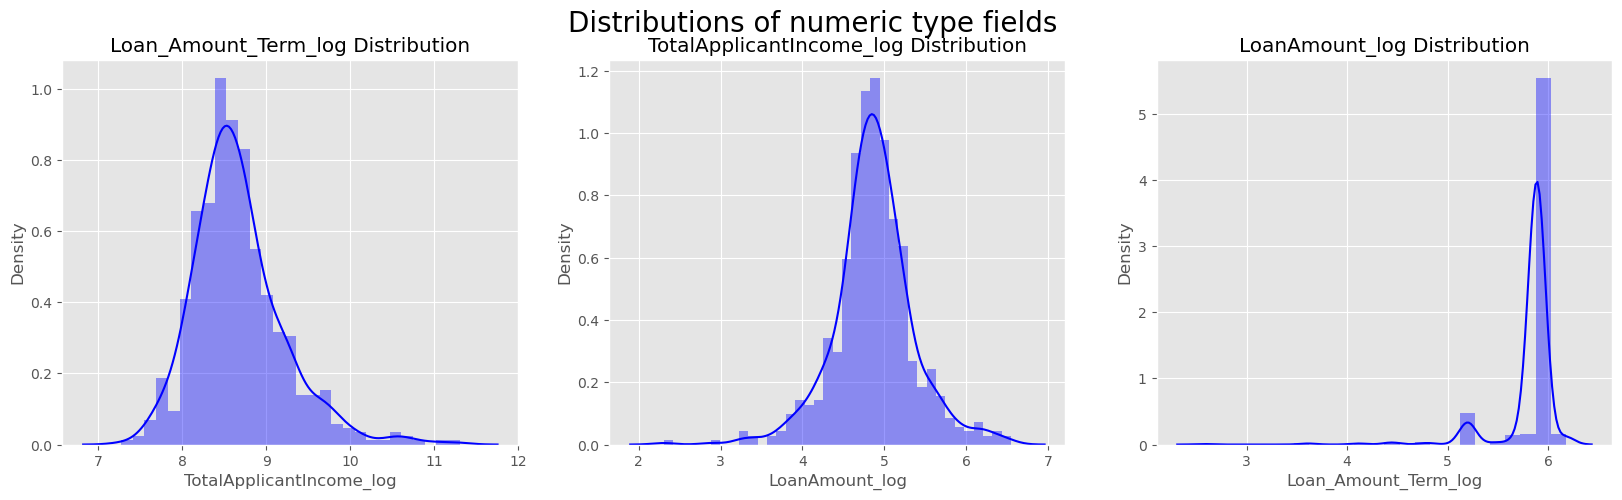

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
x_values = ['TotalApplicantIncome_log', 'LoanAmount_log', 'Loan_Amount_Term_log']

for index, ax in enumerate(axes.flatten()):
    sns.distplot(df[x_values[index]], ax=ax, color='b')
    ax.set_title(x_values[index-1] + " Distribution")

plt.subplots_adjust(wspace=0.2, hspace=0.2)
fig.suptitle('Distributions of numeric type fields', fontsize=20)
plt.savefig("Visualizations/Dist_Plots.png")
plt.show()

<h2><i>OBSERVATION</i></h2>
<a name="dist_observation"></a>
  <h3>1. Loan_Amount_Term_log Distribution</h3>
    <ul>
      <li>The distribution of Loan Amount Term (log-transformed) is roughly normal with a peak around 9, having a slight positive skew.</li>
      <li>This indicates that there are more loans with shorter terms than longer ones.</li>
    </ul>
  <h3>2. TotalApplicantIncome_log Distribution</h3>
    <ul>
      <li>The distribution of Total Applicant Income (log-transformed) is slightly skewed to the right with a peak around 5.</li>
      <li>This suggests that there are fewer applicants with exceptionally high incomes.</li>
    </ul>
  <h3>3. LoanAmount_log Distribution</h3>
    <ul>
      <li>The distribution of Loan Amount (log-transformed) is sharply peaked around 6 and is right-skewed</li>
      <li>This suggests that while most loans are of a similar amount, there are a few loans that are significantly larger.</li>
    </ul>

<h2>4.4 Using Scatter Plots to observe the relationships between numemeric variables</h2>
<a name="scatter"></a>

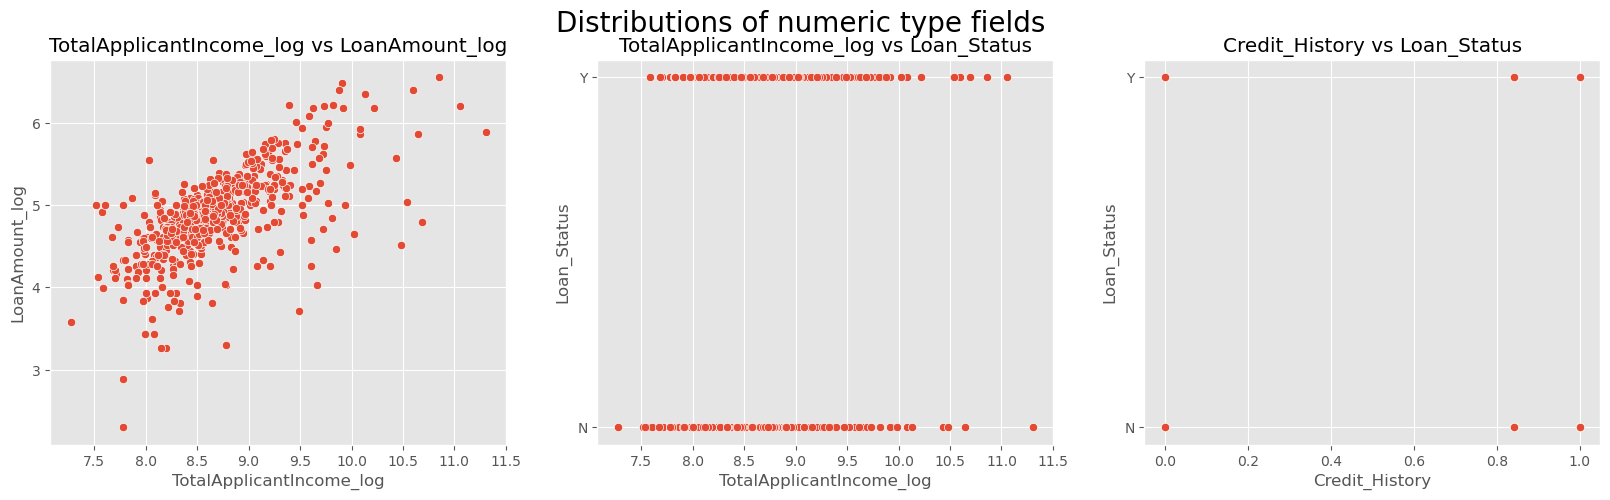

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
x_values = ['TotalApplicantIncome_log', 'TotalApplicantIncome_log', 'Credit_History']
y_values = ['LoanAmount_log', 'Loan_Status', 'Loan_Status']

for index, ax in enumerate(axes.flatten()):
    sns.scatterplot(x=df[x_values[index]], y=df[y_values[index]], ax=ax)
    ax.set_title(x_values[index] + " vs " + y_values[index])

plt.subplots_adjust(wspace=0.2, hspace=0.2)
fig.suptitle('Distributions of numeric type fields', fontsize=20)
plt.savefig("Visualizations/scatter_Plots.png")
plt.show()

<h2><i>OBSERVATION</i></h2>
<a name="scatter_observation"></a>
  <h3>1. TotalApplicantIncome_log vs LoanAmount_log</h3>
    <ul>
      <li>There is a positive correlation between Total Applicant Income (log-transformed) and Loan Amount (log-transformed).</li>
      <li>This suggests that applicants with higher incomes tend to take larger loan amounts.</li>
    </ul>
  <h3>2. TotalApplicantIncome_log vs Loan_Status</h3>
    <ul>
      <li>There is no clear separation or trend indicating that higher incomes result in higher loan approval rates.</li>
      <li>This indicates that loan approval (Loan_Status) does not seem to be strongly dependent on the Total Applicant Income (log-transformed)</li>
    </ul>
  <h3>3. Credit_History vs Loan_Status</h3>
    <ul>
      <li>There is distinction between applicants with Credit History values of 0 and 1.</li>
      <li>This indicates that credit History is a strong indicator of loan approval.</li>
    </ul>

<h2>4.5 Using Box Plots to look for outliers</h2>
<a name="box"></a>

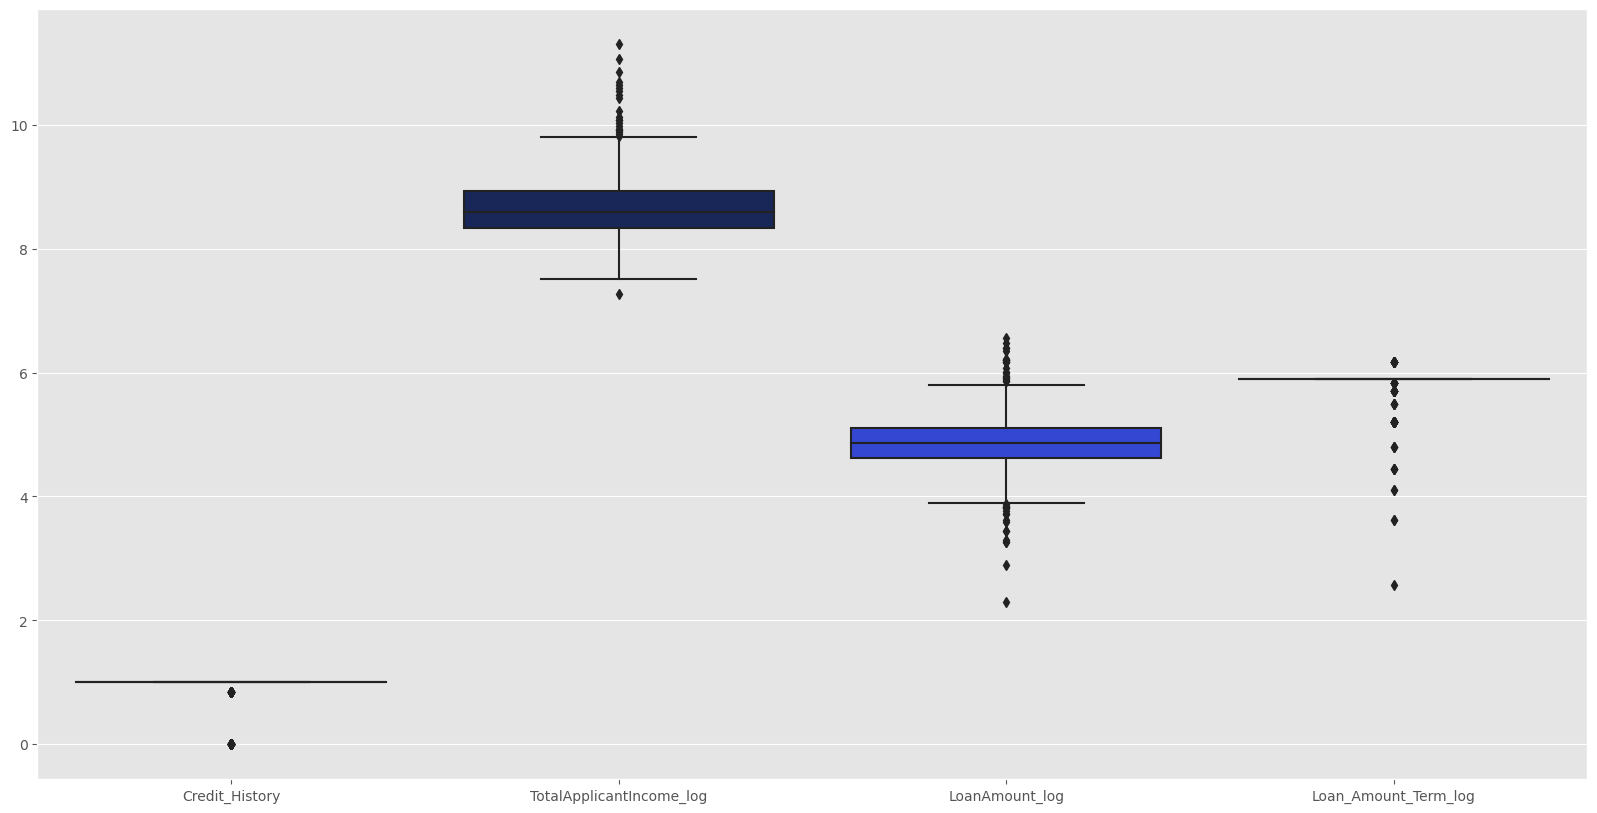

In [23]:
plt.figure(figsize=(20,10))
sns.boxplot(data = df, palette=['#520b70', '#0d2163', '#1a33ed'])
plt.savefig("Visualizations/Box_Plots.png")
plt.show()

<h2><i>OBSERVATION</i></h2>
<a name="box_obervation"></a>
  <h3>1. Credit_History</h3>
    <ul>
      <li>There are a few outliers below 0.5, but most of the data is concentrated at the 0 and 1 marks.</li>
      <li>This indicates that there may be a few erroneous or special cases in the data.</li>
    </ul>
  <h3>2. TotalApplicantIncome_log</h3>
    <ul>
      <li>Shows a median around 8.25 with a relatively symmetrical distribution and several outliers on both the high and low ends</li>
      <li>This indicates that most applicants have a log-transformed income around 8.25</li>
      <li>The presence of outliers suggests there are a few applicants with exceptionally high or low incomes, which may need special consideration in loan evaluations.</li>
    </ul>
  <h3>3. LoanAmount_log</h3>
    <ul>
      <li>Shows a median around 5.5 with a distribution skewed slightly to the higher values and numerous outliers on the higher end</li>
      <li>This indicates that most loan amounts are concentrated around the log value of 5.5, indicating a common loan amount among applicants.</li>
      <li>The outliers represent larger loans which may require special handling.</li>
    </ul>
  <h3>4. Loan_Amount_Term_log</h3>
    <ul>
      <li>Shows a median around 6 with a slight skew towards higher values and numerous outliers on the higher end</li>
      <li>This suggests that the majority of loan terms are concentrated around the log value of 6, suggesting a common loan term duration</li>
      <li>The presence of outliers indicates that some loans have significantly longer terms.</li>
    </ul>

<h1>Saving cleaned dataset</h1>

In [24]:
df.to_csv("Cleaned_dataset/Cleaned_dataset.csv", index=False)

<h1><i>THE END</i></h1>